<a href="https://colab.research.google.com/github/luisflorenz/jupyter_data/blob/main/neural_networks_and_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks and Embeddings for Natural Language Processing
Outline:

 *Download the Data

 *Prepare Data for Training

 *Logistic Regression Model

 *Feed Forward Nueral Network

 Dataset: https://www.kaggle.com/c/quora-insincere-questions-classification



# Download the Data
Upload your kaggle.json file to Colab

In [1]:
!ls

data  kaggle.json  sample_data	submission.csv


In [2]:
import os

In [3]:
IS_KAGGLE = 'KAGGLE_KERNEL_RUN_TYPE' in os.environ

In [4]:
if IS_KAGGLE:
    data_dir = '../input/quora-insincere-questions-classification'
    train_fname = data_dir + '/train.csv'
    test_fname = data_dir + '/test.csv'
    sub_fname = data_dir + '/sample_submission.csv'
else:
    os.environ['KAGGLE_CONFIG_DIR'] = '.'
    !kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data
    train_fname = 'data/train.csv.zip'
    test_fname = 'data/test.csv.zip'
    sub_fname = 'data/sample_submission.csv.zip'

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import pandas as pd

In [6]:
raw_df = pd.read_csv(train_fname)
test_df = pd.read_csv(test_fname)
sub_df = pd.read_csv(sub_fname)

In [7]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [8]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [9]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [10]:
if IS_KAGGLE:
    sample_df = raw_df
else:
    sample_df = raw_df.sample(100_000, random_state=42)

In [11]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [12]:
sample_df.target.value_counts(normalize=True)

0    0.93962
1    0.06038
Name: target, dtype: float64

## Prepare Data for Training
Outline:

 * Convert text to TF-IDF Vectors
 * Split training & validation set
 * Convert to PyTorch tensors

## Conversion to TF-IDF Vectors

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
word_tokenize('this is something (interesting)')

['this', 'is', 'something', '(', 'interesting', ')']

In [16]:
stemmer = SnowballStemmer(language='english')

In [17]:
stemmer.stem('going')

'go'

In [18]:
def tokenize(text):
  return[stemmer.stem(token) for token in word_tokenize(text)]

In [19]:
tokenize('this is an amazing live, here right now!')

['this', 'is', 'an', 'amaz', 'live', ',', 'here', 'right', 'now', '!']

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
english_stopwords = stopwords.words('english')

In [22]:
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [23]:
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=1000)

In [24]:
sample_df.question_text

443046     What is the most effective classroom managemen...
947549     Can I study abroad after 10th class from Bangl...
523769           How can I make friends as a college junior?
949821     How do I download free APK Minecraft: Pocket E...
1030397    Like Kuvera, is "Groww" also a free online inv...
                                 ...                        
998930     How do I research list of reliable charcoal im...
66641      What are petroleum products, and what is petro...
90024      What are some services that will let you quick...
130113     What credit card processors do online marketpl...
1137            On which number system does a computer work?
Name: question_text, Length: 100000, dtype: object

In [25]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 26.1 s, sys: 84.1 ms, total: 26.2 s
Wall time: 26.3 s


TfidfVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7a84b9a92b00>)

In [26]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

trasform the questions into vectors

In [27]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 26.1 s, sys: 56.8 ms, total: 26.1 s
Wall time: 26.2 s


In [28]:
inputs.shape

(100000, 1000)

In [29]:
inputs[0].toarray()[:60]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07905433, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [30]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 1min 37s, sys: 260 ms, total: 1min 37s
Wall time: 1min 38s


In [31]:
test_inputs.shape

(375806, 1000)

## Split training and validation set

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
targets = sample_df.target

In [34]:
targets.shape

(100000,)

In [35]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets,
                                                                        test_size=.3, random_state=42)

In [36]:
train_inputs.shape, val_inputs.shape

((70000, 1000), (30000, 1000))

In [37]:
train_inputs.shape

(70000, 1000)

In [38]:
train_targets

133883     0
343925     0
1190558    0
317078     0
355610     0
          ..
262505     0
879467     0
411614     0
859707     0
683832     0
Name: target, Length: 70000, dtype: int64

In [39]:
val_targets

21515      0
19779      0
1202427    0
428539     0
205091     0
          ..
902277     0
333077     0
1024121    0
180571     0
862962     0
Name: target, Length: 30000, dtype: int64

## Convert to PyTorch Tensors

In [40]:
import torch

In [41]:
train_inputs_tensors = torch.tensor(train_inputs.toarray()).float()
val_inputs_tensors = torch.tensor(val_inputs.toarray()).float()

In [42]:
train_inputs_tensors.shape

torch.Size([70000, 1000])

In [43]:
type(train_targets)

pandas.core.series.Series

In [44]:
train_target_tensor = torch.tensor(train_targets.values).float()
val_target_tensor = torch.tensor(val_targets.values).float()

In [45]:
test_inputs_tensor = torch.tensor(test_inputs.toarray()).float()

## Create a pytoch Data Lowders

In [46]:
from torch.utils.data import TensorDataset, DataLoader

In [47]:
train_ds = TensorDataset(train_inputs_tensors, train_target_tensor)
val_ds = TensorDataset(val_inputs_tensors, val_target_tensor)
test_ds = TensorDataset(test_inputs_tensor)

In [48]:
train_ds[:10]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [49]:
BATCH_SIZE = 128

In [50]:
train_dl = DataLoader(train_ds, batch_size = BATCH_SIZE, shuffle=True)
val_dl = DataLoader(val_ds, batch_size = BATCH_SIZE)
test_dl = DataLoader(test_ds, batch_size = BATCH_SIZE)

In [51]:
for batch in train_dl:
  batch_inputs = batch[0]
  batch_targets = batch[1]
  print('batch_inputs.shape', batch_inputs.shape)
  print('batch_targets.shape', batch_targets.shape)
  break


batch_inputs.shape torch.Size([128, 1000])
batch_targets.shape torch.Size([128])


In [52]:
len(train_dl)

547

In [53]:
len(train_dl)*128

70016

## Logistic Regression Model

In [54]:
import torch.nn as nn
import torch.nn.functional as F

In [56]:
class QuoraNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(1000, 512)
    self.layer2 = nn.Linear(512, 256)
    self.layer3 = nn.Linear(256, 128)
    self.layer4 = nn.Linear(128, 1)


  def forward(self, inputs):
    out = self.layer1(inputs)
    out = F.relu(out)
    out = self.layer2(out)
    out = F.relu(out)
    out = self.layer3(out)
    out = F.relu(out)
    out = self.layer4(out)

    return out

In [57]:
model = QuoraNet()

In [58]:
from sklearn.metrics import accuracy_score, f1_score

In [59]:
for batch in train_dl:
  bi, bt = batch
  print('inputs.shape', bi.shape)
  print('targets,shape', bt.shape)

  bo = model(bi)
  print('bo.shape', bo.shape)

  # Convert outputs to probabilities
  probs = torch.sigmoid(bo[:,0])
  print('probs', probs[:10])

  # Convert probs to predictions
  preds = (probs > 0.5).int()
  print('preds', preds[:10])
  print('targets', bt[:10])

  # Check metrcs
  print('accuracy', accuracy_score(bt, preds))
  print('f1_score', f1_score(bt, preds))

  # Loss
  print('loss', F.binary_cross_entropy(probs.float(), bt))
  break

inputs.shape torch.Size([128, 1000])
targets,shape torch.Size([128])
bo.shape torch.Size([128, 1])
probs tensor([0.4937, 0.4934, 0.4939, 0.4932, 0.4937, 0.4932, 0.4940, 0.4936, 0.4937,
        0.4934], grad_fn=<SliceBackward0>)
preds tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
targets tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
accuracy 0.9765625
f1_score 0.0
loss tensor(0.6808, grad_fn=<BinaryCrossEntropyBackward0>)


In [60]:
bi[:10]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [61]:
bt[:10]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [62]:
bo[:10]

tensor([[-0.0254],
        [-0.0265],
        [-0.0245],
        [-0.0273],
        [-0.0252],
        [-0.0274],
        [-0.0240],
        [-0.0257],
        [-0.0253],
        [-0.0266]], grad_fn=<SliceBackward0>)

Evaluate model preformance

In [63]:
def evaluate(model, dl):
  losses,accs, f1s = [], [], []
  # loops of the batches
  for batch in dl:
    # gets inputs and targets
    inputs, targets = batch

    # pass inputs through model
    outputs = model(inputs)

    # Convert to probabities
    probs = torch.sigmoid(outputs[:,0])

    # Compute loss
    loss = F.binary_cross_entropy(probs,
                                  targets,
                                  weight =torch.tensor(20))

    # Compute preds
    preds = (probs > 0.5).int()

    # Compute accuracy & f1 score
    acc = accuracy_score(targets, preds)
    f1 = f1_score(targets, preds)

    losses.append(loss)
    accs.append(acc)
    f1s.append(f1)

    return (torch.mean(torch.tensor(losses)).item(),
            torch.mean(torch.tensor(accs)).item(),
            torch.mean(torch.tensor(f1s)).item())


In [64]:
evaluate(model, train_dl)

(13.615696907043457, 0.9765625, 0.0)

In [65]:
evaluate(model, val_dl)

(13.636041641235352, 0.9375, 0.0)

## Train the model batch by batch

In [66]:
def fit(epochs, lr, model, train_dl, val_dl):
  optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=1e-5)
  history = [] # for recording epoch-wise results


  for epoch in range(epochs):
    # Training phase
    for batch in train_dl:
      # Gets inputs and targets
      inputs, targets = batch

      # Get model outputs
      out = model(inputs)

      # Get probabilities
      probs = torch.sigmoid(out[:,0])

      # Compute the loss of the model
      loss = F.binary_cross_entropy(probs,
                                    targets,
                                    weight =torch.tensor(20))

      # Peform the optimization
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # Evaluation phase
    loss, acc, f1 =  evaluate(model, val_dl)
    print('Epoch: {}; loss: {:.4f}; Accuracy: {:.4f}; f1 Score: {:.4f}'.format(
        epoch+1, loss, acc, f1 ))
    history.append([loss, acc, f1])

  return history






In [67]:
model = QuoraNet()

In [68]:
history = []

In [69]:
history.append(evaluate(model, val_dl))

In [70]:
history

[(13.450299263000488, 0.9375, 0.0)]

In [71]:
history += fit(5, 0.001, model, train_dl, val_dl)

Epoch: 1; loss: 4.3265; Accuracy: 0.9297; f1 Score: 0.3077
Epoch: 2; loss: 4.6619; Accuracy: 0.9453; f1 Score: 0.3636
Epoch: 3; loss: 4.9054; Accuracy: 0.9453; f1 Score: 0.2222
Epoch: 4; loss: 5.2225; Accuracy: 0.9453; f1 Score: 0.2222
Epoch: 5; loss: 8.4271; Accuracy: 0.9453; f1 Score: 0.2222


In [72]:
history += fit(5, 0.001, model, train_dl, val_dl)

Epoch: 1; loss: 5.7150; Accuracy: 0.9297; f1 Score: 0.3077
Epoch: 2; loss: 7.8107; Accuracy: 0.9453; f1 Score: 0.3636
Epoch: 3; loss: 9.7084; Accuracy: 0.9453; f1 Score: 0.3636
Epoch: 4; loss: 9.7918; Accuracy: 0.9375; f1 Score: 0.3333
Epoch: 5; loss: 12.4975; Accuracy: 0.9453; f1 Score: 0.3636


In [73]:
history

[(13.450299263000488, 0.9375, 0.0),
 [4.326544284820557, 0.9296875, 0.3076923076923077],
 [4.661857604980469, 0.9453125, 0.36363636363636365],
 [4.905404567718506, 0.9453125, 0.2222222222222222],
 [5.222517013549805, 0.9453125, 0.2222222222222222],
 [8.427108764648438, 0.9453125, 0.2222222222222222],
 [5.7149658203125, 0.9296875, 0.3076923076923077],
 [7.8106536865234375, 0.9453125, 0.36363636363636365],
 [9.7084379196167, 0.9453125, 0.36363636363636365],
 [9.791815757751465, 0.9375, 0.3333333333333333],
 [12.497456550598145, 0.9453125, 0.36363636363636365]]

In [74]:
losses = [item[0] for item in history]
accs = [item[1] for item in history]
f1s = [item[2] for item in history]

In [75]:
import matplotlib.pyplot as plt

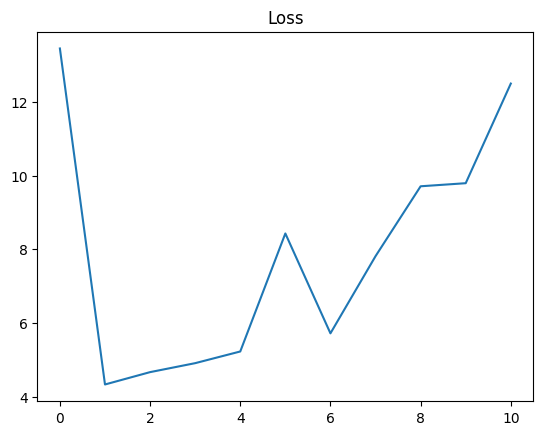

In [76]:
plt.title('Loss')
plt.plot(losses);

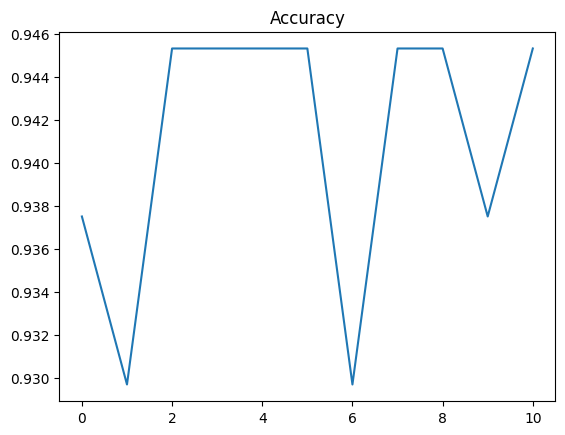

In [77]:
plt.title('Accuracy')
plt.plot(accs);

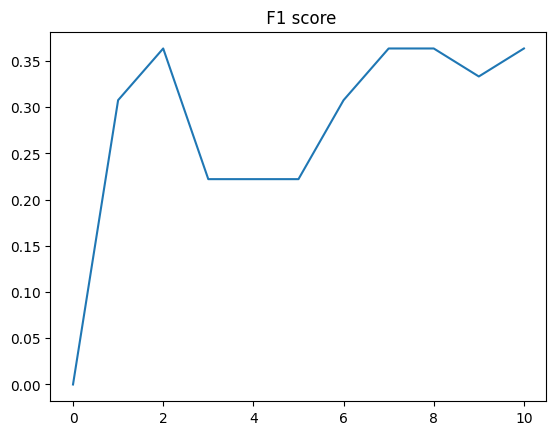

In [78]:
plt.title(' F1 score')
plt.plot(f1s);

## Make predictions on example data

In [91]:
small_df = raw_df.sample(10)

In [92]:
small_df

,qid,question_text,target
632379,7bd604fb78f9680ad43b,What do couples argue about most?,0
380004,4a7ba8a3cc6a7c69df19,What is Fritz Roethlisberger famous for?,0
416727,51ac417f4132bd76e8dd,How do I phrase the answer using the fact that...,0
715321,8c066ea668270f98a448,Can I get the discount offers for review wizard?,0
23354,0493f85027a2f04ea2b9,Why I do feel dengue weakness after a year?,0
1219987,ef1b5e3e801666f6e990,Is Arvind Kejriwal of India similar to Imran K...,0
215260,2a19c9db3849c37d2a68,How much 12th boards question paper is from NC...,0
670574,8353db5fc73383c21bca,How do I remember things more and faster while...,0
386242,4bad25edfbacfae1c5ad,How can I make the Moog synth sounds from Elec...,0
764461,95c4f030e1bab0331165,Which are the best overseas education consulta...,0


In [93]:
def predict_df(df):
  inputs = vectorizer.transform(df.question_text)
  input_tensor = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensor)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs > 0.5).int()
  return preds

In [94]:
small_df.target.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [95]:
predict_df(small_df)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)

In [96]:
small_df.question_text.values

array(['What do couples argue about most?',
       'What is Fritz Roethlisberger famous for?',
       'How do I phrase the answer using the fact that sulfur has d-orbitals and a reverse argument for oxygen. Why can sulfur form both SF4 and SF6 whereas oxygen can only form OF2?',
       'Can I get the discount offers for review wizard?',
       'Why I do feel dengue weakness after a year?',
       'Is Arvind Kejriwal of India similar to Imran Khan of Pakistan?',
       'How much 12th boards question paper is from NCERT in all subjects?',
       'How do I remember things more and faster while studying 7 to 8 hours?',
       'How can I make the Moog synth sounds from Electric Light Orchestra\'s "Telephone Line"?',
       'Which are the best overseas education consultants in India?'],
      dtype=object)

let's try a fuction for predict sincere and insincere test

In [97]:
def predict_text(text):
  df = pd.DataFrame({'question_text':[text]})
  inputs = vectorizer.transform(df.question_text)
  input_tensor = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensor)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs > 0.5).int()
  return preds

In [98]:
predict_text('what is the function of the plasma cell?')

tensor([0], dtype=torch.int32)

In [99]:
predict_text('Why all the democrats are stupid liberals?')

tensor([1], dtype=torch.int32)

## Generate Prediction for the Test Set

In [100]:
predict_text('Why all the democrats are stupid liberals?').detach()

tensor([1], dtype=torch.int32)

In [101]:
list(predict_text('Why all the democrats are stupid liberals?').detach().numpy())

[1]

In [102]:
test_inputs

<375806x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 2056612 stored elements in Compressed Sparse Row format>

In [103]:
import numpy as np

In [104]:
def make_preds(dl):
  all_preds = []
  for batch in dl:
    inputs = batch[0]
    outputs = model(inputs)
    probs = torch.sigmoid(outputs[:,0])
    preds = (probs > 0.5).int()
    all_preds.append(preds.detach().numpy())
  return np.concatenate(all_preds)

In [105]:
test_preds = make_preds(test_dl)

In [106]:
len(test_preds)

375806

In [107]:
test_preds

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [108]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [109]:
sub_df.prediction = test_preds

In [110]:
sub_df.prediction.value_counts()

0    361276
1     14530
Name: prediction, dtype: int64

In [111]:
sub_df.to_csv('submission.csv', index=None)

In [112]:
!head submission.csv

qid,prediction
0000163e3ea7c7a74cd7,0
00002bd4fb5d505b9161,0
00007756b4a147d2b0b3,1
000086e4b7e1c7146103,0
0000c4c3fbe8785a3090,0
000101884c19f3515c1a,0
00010f62537781f44a47,0
00012afbd27452239059,0
00014894849d00ba98a9,0
